<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/5_DataMining/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizaje de Máquina

El aprendizaje de máquina consiste en crear programas con parámetros ajustables que se ajustan automáticamente para mejorar su comportamiento adaptándose a los datos vistos anteriormente.

El aprendizaje de máquina puede considerarse un subcampo de la inteligencia artificial, ya que esos algoritmos pueden verse como bloques de construcción para hacer que las computadoras aprendan a comportarse de manera más inteligente al generalizar de alguna manera en lugar de almacenar y recuperar elementos de datos como lo haría un sistema de base de datos.


#Clasificación con Scikit-Learn

Scikit-learn tiene un conjunto de datos muy sencillo sobre estas especies de plantas. Los datos consisten en lo siguiente:

Características en el dataset Iris: largo del sépalo (cm), ancho del sépalo (cm), largo del pétalo (cm), ancho del pétalo (cm).

Clases de destino para predecir: Setosa, Versicolour y Virginica.


In [1]:
#primero importamos los datos precargados por Sklearn
from sklearn.datasets import load_iris
iris = load_iris()

Las características de cada flor de muestra se almacenan en el atributo data:

In [2]:
print("forma del dataset")
print(iris.data.shape)


n_samples, n_features = iris.data.shape
print("número de muestras del dataset")
print(n_samples)

print("número de características del dataset")
print(n_features)

print("primer dato")
print(iris.data[0])


forma del dataset
(150, 4)
número de muestras del dataset
150
número de características del dataset
4
primer dato
[5.1 3.5 1.4 0.2]


La información sobre la clase de cada muestra se almacena en el atributo objetivo:

In [3]:
print(iris.target.shape)


print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Los nombres de las clases se almacenan en el último atributo, a saber, target_names:

In [4]:
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


Hacemos un diagrama de dispersión simple de 2 características del conjunto de datos.

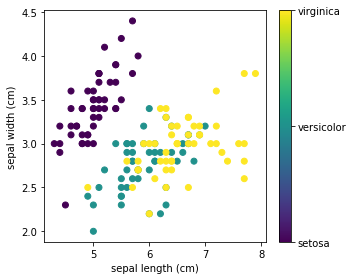

In [5]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()


¿Qué tipo de iris tiene un sépalo de 3 cm x 5 cm y un pétalo de 4 cm x 2 cm?

In [8]:
from sklearn import neighbors
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# hacemos la predicción
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


## El archivo de datos

Para las tareas de clasificación en este cuaderno usaremos un [conjunto de datos clásico](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) en el procesamiento de imágenes. Contiene imágenes de 8x8 dígitos distribuidas en 10 clases: 

|          .        |  .   |
|:-----------------:|------|
|      Classes      | 10   |
| Samples per class | ~180 |
| Samples total     | 1797 |
| Dimensionality    | 64   |

Afortunadamente, Scikit-learn viene con el módulo [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) que incluye utilidades para cargar conjuntos de datos, incluidos métodos para cargar y buscar conjuntos de datos de referencia populares.

In [ ]:
# Importar datasets, clasificadores y metricas
from sklearn import datasets

# el dataset de digitos
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


Podemos visualizar las muestras en el conjunto de datos usando matplotlib:

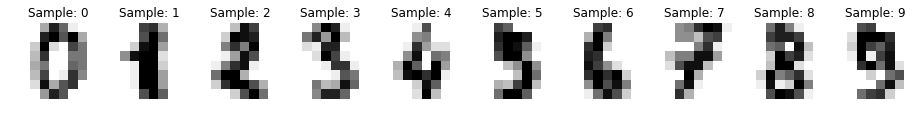

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Gráficas individuales para los dígitos en el conjunto de datos
_, axes = plt.subplots(1, 10, figsize=(16,5))
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Sample: %i' % label)
plt.show()

Primero, para entrenar un clasificador en este conjunto de datos de imagen, necesitamos aplanarlo en una matriz *(muestras, características)*:

In [ ]:
# Numero de muestras: 1797
n_samples = len(digits.images)

# Matriz de dígitos reformada
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


En segundo lugar, necesitamos dividir el conjunto de datos en subconjuntos *entrenar / probar*:

In [ ]:
from sklearn.model_selection import train_test_split

# dividimos el conjunto de datos en subconjuntos de entrenar y probar:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=1) 

In [ ]:
# Entrenar 80% y probar 20%
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


Finalmente estamos listos para entrenar a nuestro clasificador. Estamos utilizando [Clasificación de vectores de soporte C](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) implementado en Scikit-learn, que ofrece [ varios](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) clasificadores implementados.

In [ ]:
from sklearn import svm

# Clasificador de soportes vectoriales
classifier = svm.SVC(gamma=0.001)

# Aprenda a clasificar el conjunto de entrenamiento
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

¡Eso es! Ahora necesitamos evaluar el desempeño de nuestro clasificador usando el subconjunto de prueba. La predicción y el trazado de predicciones junto con las imágenes de prueba nos permite abordar cualitativamente la precisión del clasificador.

In [ ]:
# Predecir usando X_test
y_predicted = classifier.predict(X_test)

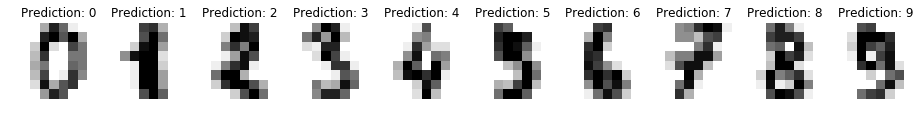

In [ ]:
# Gráficas individuales para los dígitos en el conjunto de datos(
_, axes = plt.subplots(1, 10, figsize=(16,5))
images_and_predictions = list(zip(X_test.reshape(-1,8,8), y_predicted))
for ax, (image, label) in zip(axes[:], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % label)
plt.show()

Además, las métricas cuantitativas se pueden calcular mediante [metrics.classification_report ()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Este método crea un informe de texto que muestra las principales métricas de clasificación. Cada fila indica la *precisión, recuperación y puntuación f1* para cada categoría de clasificación.


In [ ]:
from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      1.00      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




Podemos ampliar aún más estas métricas calculando la [matriz de confusión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html):

Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  0  0  0  0 34]]


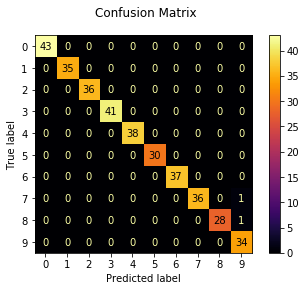

In [ ]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

**Recomendación**!
[Estadísticas en Python](http://scipy-lectures.org/packages/statistics/index.html#statistics)